# Retail Linear Regression


The following project looks at the historical retail sales data, in this case from a subset of 45 Walmart stores, and the relationship to  year (date), holidays, temperature, fuel price, consumer price index, and unemployment.<br>

The historical data covers sales from 2010-02-05 to 2012-11-01, in the file: **walmart.csv**.  

<div class="alert alert-block alert-info">
<font color='black'>
*Schema:  Dataset included* 
</font>
</div>
The source of data file: https://www.kaggle.com/datasets/yasserh/walmart-dataset 

Within the raw file you will find the following fields:

* `Store - the store number`
* `Date - the week of sales`
* `Weekly_Sales - sales for the given store`
* `Holiday_Flag - whether the week is a special holiday week` 
    * `1 – Holiday week` 
    * `0 – Non-holiday week`
* `Temperature - Temperature on the day of sale`
* `Fuel_Price - Cost of fuel in the region`
* `CPI – Prevailing consumer price index`
* `Unemployment - Prevailing unemployment rate`
* `Holiday Events:`
    * `Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13`
    * `Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13`
    * `Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13`
    * `Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13`

Ideally, I would like to answer the following types of questions:

* Does weather (Temperature) impact weekly sales (Weekly_Sales)?
* Does Fuel Price (Fuel_Price) impacted weekly sales (Weekly_Sales)?
* What is the Store (1 - 45) that has the most Sales (sum of Weekly_Sales)?
* The data also has a flag for holiday (0 - not a holiday, 1 is a holiday)?  I want to see if that impacts the results.



In [26]:
import pandas as pd
from pandas import read_fwf
from IPython.display import display

from matplotlib.pyplot import scatter, xlabel, title, plot
%matplotlib inline

df = pd.read_csv('walmart.csv') 

print("\n(All data appears to be ready.)")


(All data appears to be ready.)


In [27]:
# we see from below that we have a 6435 x 8 dataframe
# later below we validate that we have 45 unique stores, starting at Store 1 to Store 45
#

display(df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
# Show me the number of unique stores in the dataset
print(df['Store'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


Let's review the shape of object types w/ *.info()* and summary statistics with *.describe()*
Clean data (confirm no missing data, imputes/deletes as needed)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [30]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [31]:
# Return a boolean same-sized object indicating if the values are NA.
# The following shows us that the data is clean.
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

The above confirms that we have clean data <br>
In light of the above (df.info(), df.describe() and df.isna(), I am feeling good that I have clean data.

#### Iniitial Approach:  Brute force
##### Examine the relationship between (x-axis)O Temperature and (y-axis) Weekly Sales

My first 'brute' force approach was to plot the data:  x = df[Temperature] vs. y = df['Weekly_Sales']).  As you can see, the graph does not tell us much.  The issue is that we have 45 Walmart stores.  This exercise is best done at the per store level.  I will do that later in the notebook.

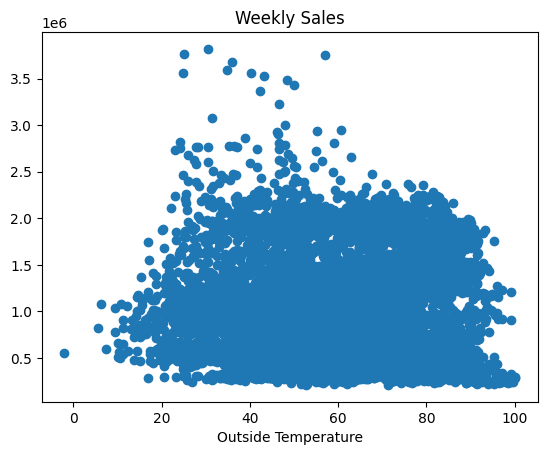

In [32]:
from matplotlib.pyplot import scatter, xlabel, title, plot
%matplotlib inline

scatter(df['Temperature'], df['Weekly_Sales'])
xlabel ('Outside Temperature')
title ('Weekly Sales');

In [33]:
#
# function to do linear regression fitting of the data
#
def linreg_fit(x, y):
    """Returns (alpha, beta) s.t. y ~ alpha*x + beta."""
    from numpy import ones
    m = len(x) ; assert len(y) == m
    
    u = ones(m)
    alpha = ((x.T).dot(y) - (1/m)*(u.T).dot(x)*(u.T).dot(y)) / ((x.T).dot(x) - (1/m)*((u.T).dot(x))**2)
    beta = (1/m)*(u.T).dot(y - alpha*x)
    
    return (alpha, beta)

# Compute the coefficients for the Walmart Retail data:
x, y = df['Temperature'], df['Weekly_Sales']
alpha, beta = linreg_fit(x, y)

print("alpha:", alpha)
print("beta:", beta)

alpha: -1952.4192272082482
beta: 1165406.0127923812


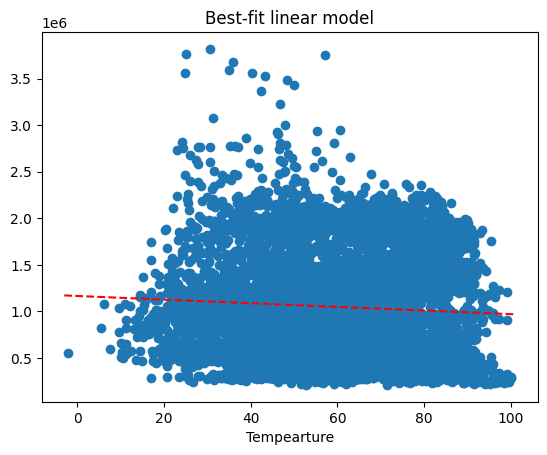

In [34]:
from numpy import linspace, floor, ceil

# Two points make a line:
x_fit = linspace(floor(x.min()), ceil(x.max()), 2)
y_fit = alpha*x_fit + beta

scatter(x, y, marker='o')
plot(x_fit, y_fit, 'r--')
xlabel('Tempearture')
title('Best-fit linear model');

In the above example, I did a linear regression fitting of the data.  Obviously, that does not tell us anything.  The issue is that we need to do it at the **per store** level.  As such, going to extract the per store level and do the linear regression for Stores 1 - 5, etc.

In [35]:
# groupby column1
df_grouped = df.groupby('Store')
df1 = df_grouped.get_group(1)
# store 1


# filter out the holiday flag
# 1 is a holiday; 0 not a holiday
#
#
# HOLIDAY_FLAG:  >= 0 includes both

NUM_STORES = 6 # starting at 1; so Stores 1 - 5
options = [i for i in range(1,NUM_STORES)]

# selecting rows based on condition 
df_n = df[df['Store'].isin(options)] 

df1 = df1.loc[df['Holiday_Flag'] >= 0]
display(df1)



print("Data for Store 1: For now, not factoring out the Holiday_Flag", len(df_n))


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573


Data for Store 1: For now, not factoring out the Holiday_Flag 715


The data has a field called Holiday_Flag:

* 0 - Not a holiday
* 1 - Holiday

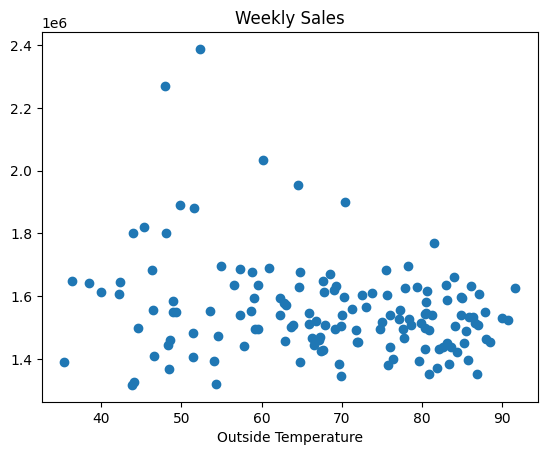

In [36]:
scatter(df1['Temperature'], df1['Weekly_Sales'])
xlabel ('Outside Temperature')
title ('Weekly Sales');


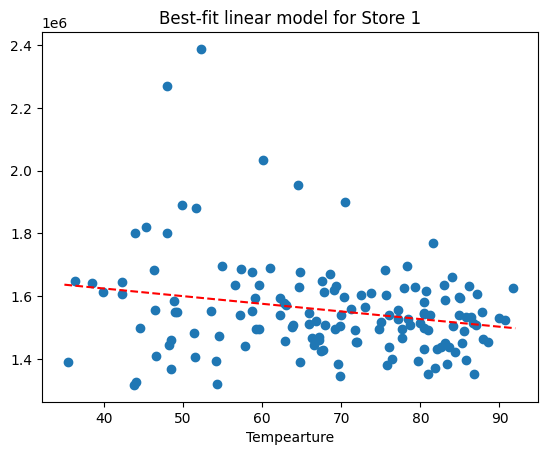

In [37]:
# Compute the coefficients for Store 1:
x, y = df1['Temperature'], df1['Weekly_Sales']
alpha, beta = linreg_fit(x, y)

# Two points make a line:
x_fit = linspace(floor(x.min()), ceil(x.max()), 2)
y_fit = alpha*x_fit + beta

scatter(x, y, marker='o')
plot(x_fit, y_fit, 'r--')
xlabel('Tempearture')
title('Best-fit linear model for Store 1');

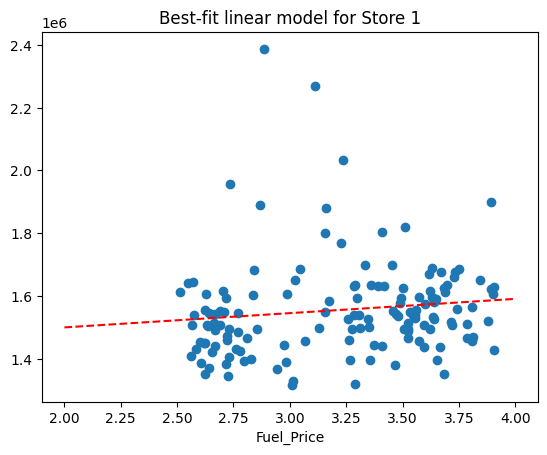

In [38]:
# x, y = df1['Temperature'], df1['Weekly_Sales']
def plot_best_fit_lin(x, y, x_label_txt, title_txt):
    # Compute the coefficients
    alpha, beta = linreg_fit(x, y)

    # Two points make a line:
    x_fit = linspace(floor(x.min()), ceil(x.max()), 2)
    y_fit = alpha*x_fit + beta

    scatter(x, y, marker='o')
    plot(x_fit, y_fit, 'r--')
    xlabel(x_label_txt)
    title(title_txt)
    

x_label_txt = 'Fuel_Price'
store_name = 'Store 1'

x, y = df1[x_label_txt], df1['Weekly_Sales']
# x, y = df1['Temperature'], df1['Weekly_Sales']


title_txt = f"Best-fit linear model for {store_name}"

plot_best_fit_lin(x, y, x_label_txt, title_txt)


In [39]:
# import matplotlib.pyplot as plt
# import seaborn as sns 

# sns.displot(df1["Weekly_Sales"])






In [40]:
# Import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# # Apply the default theme
# sns.set_theme()

# # Load an example dataset
# tips = sns.load_dataset("tips")
# tips.head()





In [41]:
import seaborn as sns

# # Create a visualization
# sns.relplot(
#     data=tips,
#     x="total_bill", y="tip", col="time",
#     hue="smoker", style="smoker", size="size",
# )

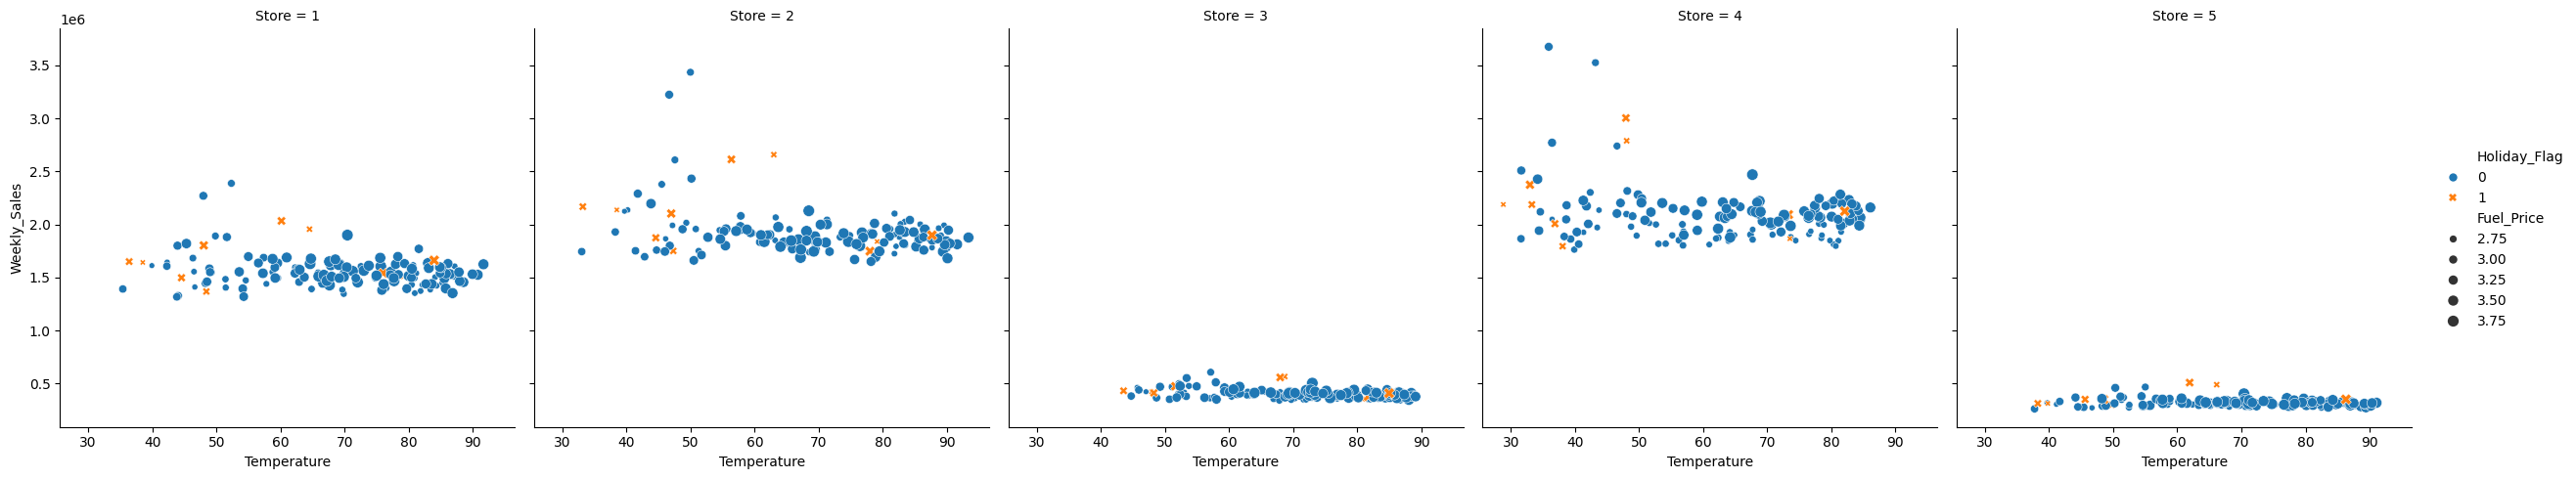

In [42]:
# Create a visualization
sns.relplot(
    data=df_n,
    x="Temperature", y="Weekly_Sales", col="Store",
    hue="Holiday_Flag", style="Holiday_Flag", size="Fuel_Price",
)

Click on a graph above to see additional detail.  Above, I plot the retail data for Stores 1 thru 5.  Upon close examination of the charts, it does not "visually" appear that temperature has much of an impact with regards to Weekly_Sales.  The holidays are captured as an orange **<font color='orange'>X</font>**.

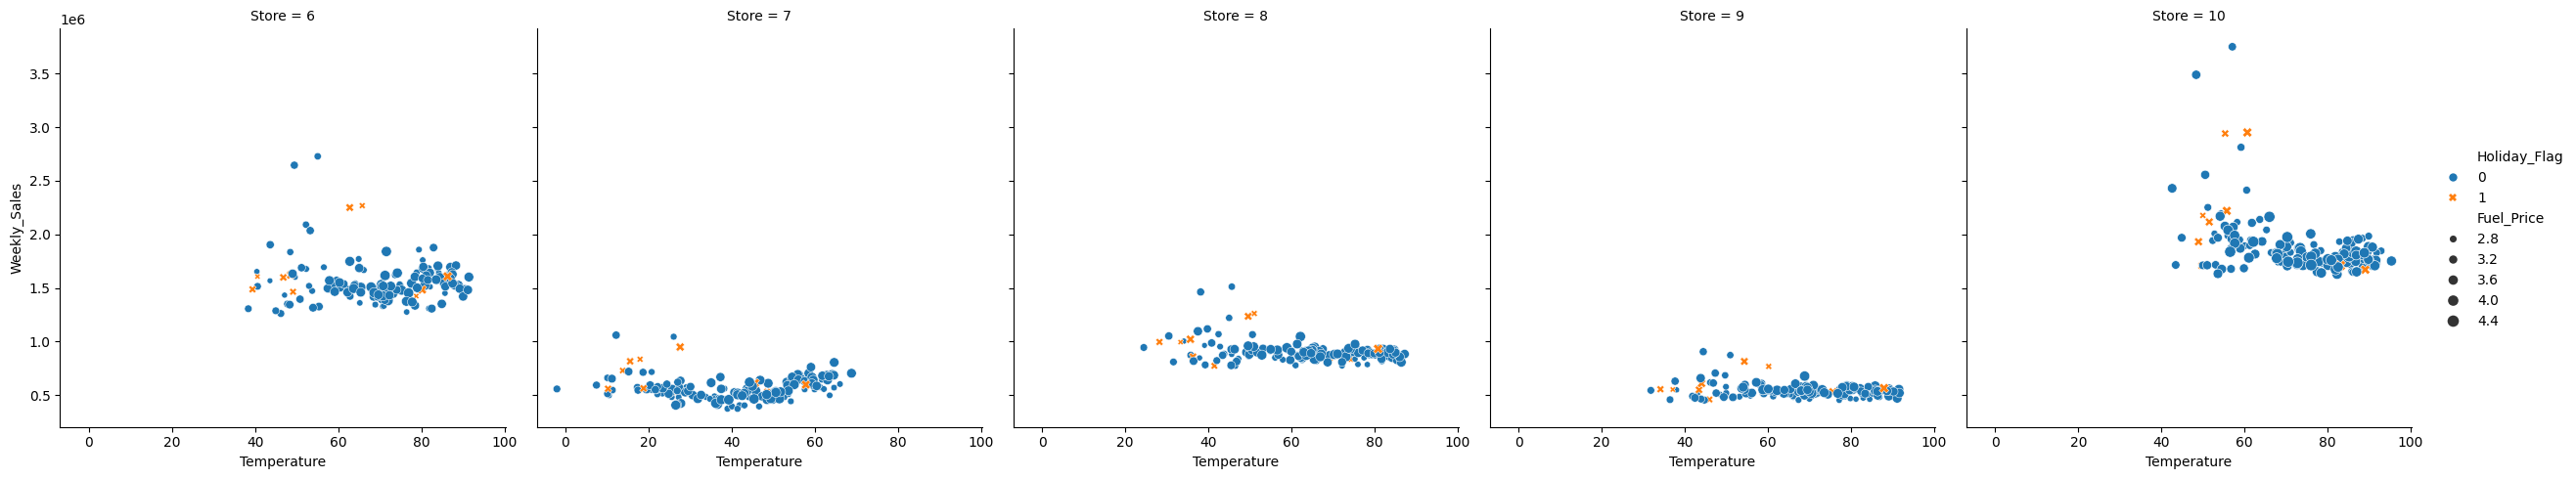

In [43]:
NUM_STORES = 11 # starting at 1; so Stores 6 - 10
options = [i for i in range(6,NUM_STORES)]

# selecting rows based on condition 
df_n = df[df['Store'].isin(options)] 

# Create a visualization
sns.relplot(
    data=df_n,
    x="Temperature", y="Weekly_Sales", col="Store",
    hue="Holiday_Flag", style="Holiday_Flag", size="Fuel_Price",
)


The data above is for Stores 6 - 10.  Again, it does not appear that temperature makes a material difference on weekly sales.  
Below, I will quickly look at the other attributes to see if they have an impact.

### Fuel Price vs. Weekly_Sales Analysis

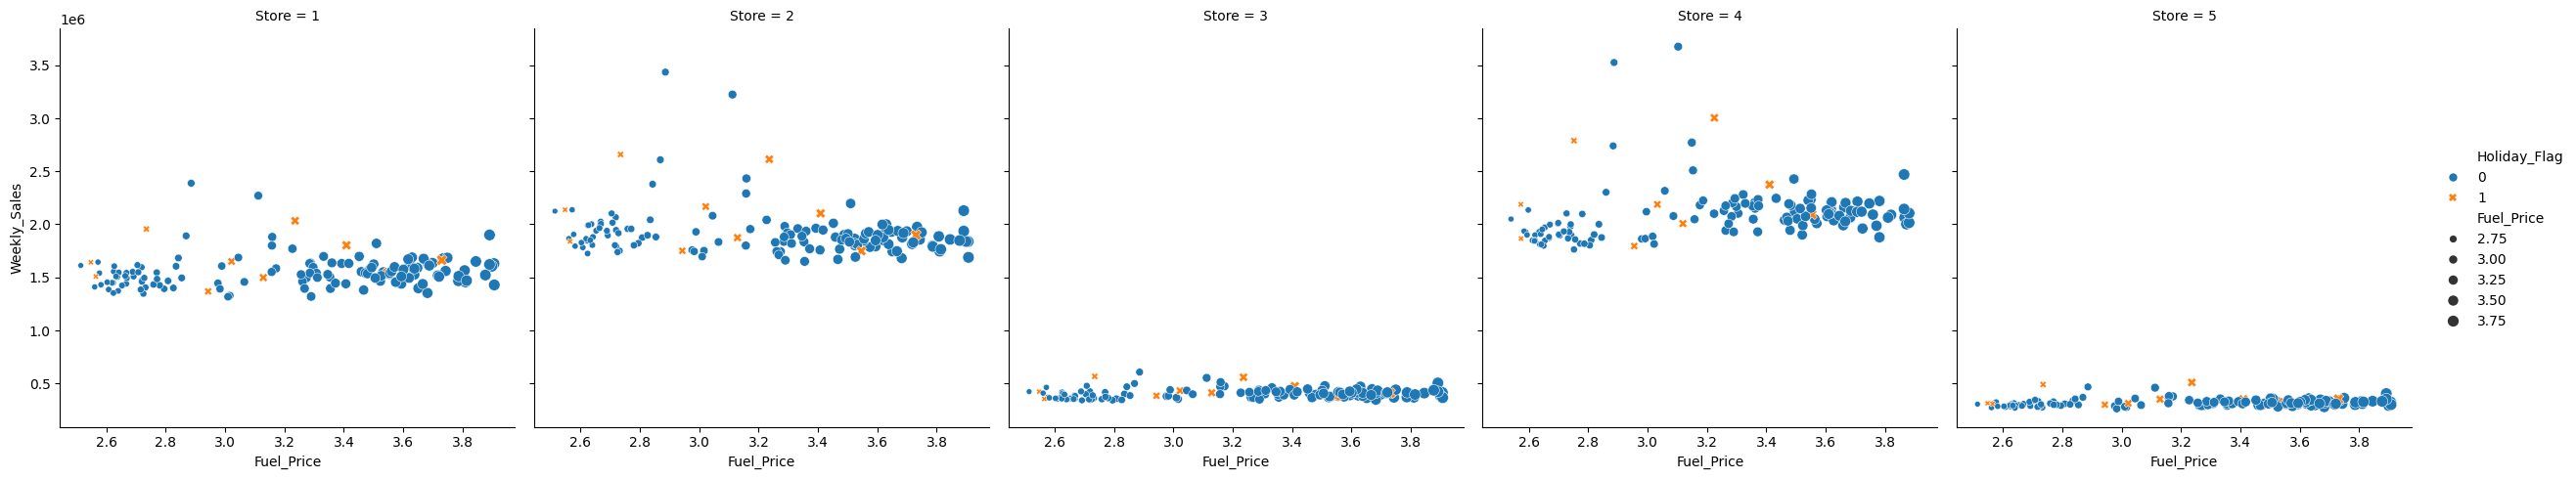

In [44]:
NUM_STORES = 6 # starting at 1; so Stores 1 - 5
START_FROM = 1 # Store 1

options = [i for i in range(START_FROM,NUM_STORES)]

# selecting rows based on condition 
df_n = df[df['Store'].isin(options)] 

# Create a visualization
sns.relplot(
    data=df_n,
    x="Fuel_Price", y="Weekly_Sales", col="Store",
    hue="Holiday_Flag", style="Holiday_Flag", size="Fuel_Price",
)


### The final analysis is too look at the stores with the highest cummulative sales


In [45]:
df_stores = df.groupby('Store')
df1 = df_stores.get_group(1)

sum(df1['Weekly_Sales'])

list_of_stores = {}

for i in range(1,46):
    df_i = df_stores.get_group(i)
    
    store_name = f"Store {i}"
    number = sum(df_i['Weekly_Sales'])
    
    list_of_stores[store_name] = number
    
    formatted_number = "${:,.2f}".format(number)
    msg = f"Store {i}   : {formatted_number}"
    print(msg)
    
    
max_key = max(list_of_stores, key=list_of_stores.get)
max_value = list_of_stores[max_key]

formatted_max = "${:,.2f}".format(max_value)


msg = f"\nThe store with the most cummulative sales: {max_key} = {formatted_max}"

print(msg)

Store 1   : $222,402,808.85
Store 2   : $275,382,440.98
Store 3   : $57,586,735.07
Store 4   : $299,543,953.38
Store 5   : $45,475,688.90
Store 6   : $223,756,130.64
Store 7   : $81,598,275.14
Store 8   : $129,951,181.13
Store 9   : $77,789,218.99
Store 10   : $271,617,713.89
Store 11   : $193,962,786.80
Store 12   : $144,287,230.15
Store 13   : $286,517,703.80
Store 14   : $288,999,911.34
Store 15   : $89,133,683.92
Store 16   : $74,252,425.40
Store 17   : $127,782,138.83
Store 18   : $155,114,734.21
Store 19   : $206,634,862.10
Store 20   : $301,397,792.46
Store 21   : $108,117,878.92
Store 22   : $147,075,648.57
Store 23   : $198,750,617.85
Store 24   : $194,016,021.28
Store 25   : $101,061,179.17
Store 26   : $143,416,393.79
Store 27   : $253,855,916.88
Store 28   : $189,263,680.58
Store 29   : $77,141,554.31
Store 30   : $62,716,885.12
Store 31   : $199,613,905.50
Store 32   : $166,819,246.16
Store 33   : $37,160,221.96
Store 34   : $138,249,763.00
Store 35   : $131,520,672.08
Sto

### Store 20 has the most sales sum(weekly_sales) = $301,397,792.46

The final analysis is to look at the day, month and year.  It turns out that the data column has data in the following format:

* 12-02-2010	# mm-dd-yyyy
* 28-09-2012    # dd-mm-yyyy

So need to create a helper function to split and parse the Dates column, accordingly.

#### I will focus specifically on the year for Store 20

In [46]:
# helper functions to parse out the date field

def split_date_day(date_string):
    # Split the date string using the '-' separator
    day, month, year = date_string.split('-')

    # Convert the components to integers
    day = int(day)
    month = int(month)
    year = int(year)

    return day


def split_date_month(date_string):
    # Split the date string using the '-' separator
    day, month, year = date_string.split('-')

    # Convert the components to integers
    day = int(day)
    month = int(month)
    year = int(year)

    return month

def split_date_year(date_string):
    # Split the date string using the '-' separator
    day, month, year = date_string.split('-')

    # Convert the components to integers
    day = int(day)
    month = int(month)
    year = int(year)

    return year

### Let's look at Store 20

In [47]:
df_d = df.copy()

# let's create 3 columns to hold the day, month and year
# setting to zero - 0 - initial dummy values

df_d['day'] = 0
df_d['month'] = 0
df_d['year'] = 0


df_d['day'] = df['Date'].apply(split_date_day)
df_d['month'] = df['Date'].apply(split_date_month)
df_d['year'] = df['Date'].apply(split_date_year)


df_d

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


#### Do a group by Store, in particular, we are going to look at Store 20 and then look at years 2010, 2011 and 2012


In [48]:
df_stores = df_d.groupby('Store')
df1 = df_stores.get_group(20) # Store 20

df1['year'].unique()
print("Unique years for Store 20: ", df1['year'].unique())
print("\n")

# we only have 3 years 

df_2010 = df1.groupby('year').get_group(2010)
df_2011 = df1.groupby('year').get_group(2011)
df_2012 = df1.groupby('year').get_group(2012)

df_2010

ws = sum(df_2010['Weekly_Sales'])
ws_number = "${:,.2f}".format(ws)

print("Sales for 2010 for Store 20: ", ws_number)

ws = sum(df_2011['Weekly_Sales'])
ws_number = "${:,.2f}".format(ws)
print("Sales for 2011 for Store 20: ", ws_number)


ws = sum(df_2012['Weekly_Sales'])
ws_number = "${:,.2f}".format(ws)
print("Sales for 2012 for Store 20: ", ws_number)


Unique years for Store 20:  [2010 2011 2012]


Sales for 2010 for Store 20:  $101,733,080.72
Sales for 2011 for Store 20:  $109,837,002.36
Sales for 2012 for Store 20:  $89,827,709.38


The sum for years 2010 + 2011 + 2012 add up to $301,397,792.46 (for Store 20), validating that the calculations are correct.

### Finish

#### IN Summary

I downloaded a retail dataset (Walmart) from Kaggle (as per the begining of the notebook)<br>


My goal was to answer the following questions: <br>

* Does weather (Temperature) impact weekly sales (Weekly_Sales)?
    * Does not appear to be the case, as per the analysis above

* Does Fuel Price (Fuel_Price) impacted weekly sales (Weekly_Sales)?
    * Does not appear to be the case, as per the analysis above

* What is the Store (1 - 45) that has the most Sales (sum of Weekly_Sales)?
    * Store 20, as per the analysis

* The data also has a flag for holiday (0 - not a holiday, 1 is a holiday)?  I want to see if that impacts the results.
    * The holiday flags to do not appear to be significant as per the seaborn plots


### The analysis done was linear regression

The per Store data was visually displayed using matplotlib and seaborn maps
* Looked at the relationship between **Temperature** and **Weekly_Sales**
* Looked at the relationship between **Fuel Price** and **Weekly_Sales**


#### Conclusion
#### ---Did I answer my questions?
Yes.  But not to my satisfaction.  I felt that Temperature and / or Fuel_Price would surely have impacted Weekly Sales.  That did not appear to be the case

#### ---What problems did I run into?
The analysis needed to be done at the per Store level, not as a whole.  So I looked at a subset of the store data.  I did not look at all 45 stores, only looked at 10 or so stores.   I calculated the store with the most sales, for the data that I had, it was **Store 20**.  I also had to clean/handle the **Date** column since it was not stored consistently: 12-02-2010 or 28-09-2012.  My guess is that some of the store data was from international stores.



#### ---Suggestions for future research/improvement?
Important to choose the data set correctly.  In hindsight, I would have  spent more time looking / researching data sets a bit more to be able to do additional analysis.  That said, this was a great learning experience.  The documentation of the project takes a bit more time than expected.


